# 2. Breast Cancer Detection Using MIAS Dataset

#### 2.1 Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import pydot
import matplotlib.pyplot as plt
import cv2
import os
from numpy.random import seed
seed(101)

import tensorflow
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

import h5py
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model 
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import timeit
import warnings
warnings.filterwarnings("ignore")

#### 1.2 Loading the dataset

In [2]:
## loading the MIAS data
folder_path_MIAS = 'E:/NN project/Dataset of Mammography with Benign Malignant Breast Masses/MIAS Dataset/'
num_of_epochs = 100
batchsize = 128
image_class_label = 0
Mias_data_labels = []
Mias_data_images = []

In [3]:
def loading_images_from_folder(folder, image_class_label):
	for file_name in os.listdir(folder):
		og_img = cv2.imread(os.path.join(folder, file_name))
		if og_img is not None:
			og_img = cv2.resize(og_img, (140,92))  ## resizing the image
			og_img = og_img.reshape(92,140,3)
			Mias_data_images.append(og_img)				 ## Appending all the resized Images
			Mias_data_labels.append(image_class_label)		 ## Adding the respective labels
		
	image_class_label += 1
	return image_class_label

In [4]:
image_class_label = loading_images_from_folder(folder_path_MIAS+'Malignant Masses', image_class_label)
image_class_label = loading_images_from_folder(folder_path_MIAS+'Benign Masses', image_class_label)

In [5]:
# converting the images to an array
MIAS_Data = np.asarray(Mias_data_images)
MIAS_Labels = np.asarray(Mias_data_labels)

#### 1.3 Splitting MIAS dataset

In [6]:
# Splitting the "MIAS" Data as Train, Validation and Test
X_train, X_test, y_train, y_test = train_test_split(MIAS_Data, MIAS_Labels, test_size=0.2, random_state=21)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [7]:
## Size of dataset before Normalization
print("Before Normalization - ")
print("Shape of X Train = ", X_train.shape, "Shape of X test = ", X_test.shape)
print("Shape of Y Train = ", y_train.shape, "Shape of Y Test = ", y_test.shape)
print("Shape of X Validation = ", X_valid.shape, "Shape of Y Validation = ", y_valid.shape)

Before Normalization - 
Shape of X Train =  (2746, 92, 140, 3) Shape of X test =  (764, 92, 140, 3)
Shape of Y Train =  (2746,) Shape of Y Test =  (764,)
Shape of X Validation =  (306, 92, 140, 3) Shape of Y Validation =  (306,)


In [8]:
# Normalizing the data
X_train = X_train / 255  ## original scale : 255
X_valid = X_valid / 255         ## new image scale : 0-1
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_valid = np_utils.to_categorical(y_valid)
y_test = np_utils.to_categorical(y_test)
number_of_classes = y_test.shape[1]

In [9]:
# Printing the results After Normalization
print("After Normalization -")
print("Shape of X Train = ", X_train.shape, "Shape of X test = ", X_test.shape)
print("Shape of Y Train = ", y_train.shape, "Shape of Y Test = ", y_test.shape)
print("Shape of X Validation = ", X_valid.shape, "Shape of Y Validation = ", y_valid.shape)

After Normalization -
Shape of X Train =  (2746, 92, 140, 3) Shape of X test =  (764, 92, 140, 3)
Shape of Y Train =  (2746, 2) Shape of Y Test =  (764, 2)
Shape of X Validation =  (306, 92, 140, 3) Shape of Y Validation =  (306, 2)


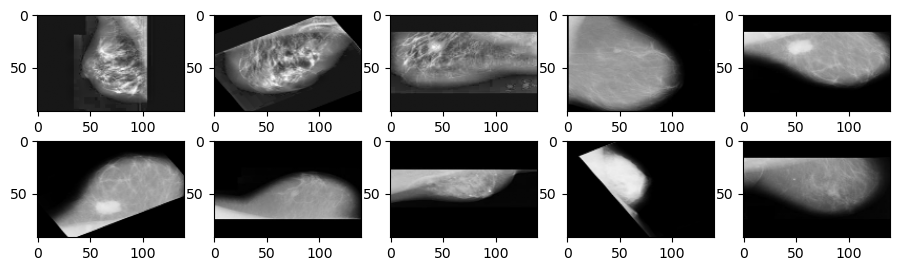

In [10]:
# Showing the Images
plt.figure(figsize=(11,3))
for i in range(10):
  plt.subplot(2,5,1+i)
  plt.imshow(X_train[i], cmap='gray')

#### 1.4.1 Advance Building Model for MIAS Data

In [11]:
# Advanced CNN model for MIAS Dataset - Adding more layers to the model
def adv_breastCancer_model():
	adv_model = Sequential()
	adv_model.add(Conv2D(32, (3, 3), input_shape=(92,140,3), activation='relu', padding="same"))
	adv_model.add(MaxPooling2D(pool_size=(2, 2)))
	adv_model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same'))  
	adv_model.add(MaxPooling2D(pool_size=(2, 2)))
	adv_model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))  ## new layer added
	adv_model.add(MaxPooling2D(pool_size=(2, 2)))
	adv_model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))  ## new layer added
	adv_model.add(MaxPooling2D(pool_size=(2, 2)))
	adv_model.add(Dropout(0.5))
	adv_model.add(Flatten())
	adv_model.add(Dropout(0.5))
	#adv_model.add(Dense(64, activation='relu'))
	#adv_model.add(Dropout(0.5))
	adv_model.add(Dense(50, activation='relu'))		 ## new layer added
	adv_model.add(Dropout(0.2))
	adv_model.add(Dense(number_of_classes, activation='softmax'))

	adv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return adv_model

In [12]:
# Building the model
adv_model = adv_breastCancer_model()
adv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 140, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 70, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 70, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 35, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 17, 64)       0

In [13]:
# Fitting the CNN model
start = timeit.default_timer()
adv_hist = adv_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                            batch_size=batchsize, epochs=num_of_epochs)
stop = timeit.default_timer()
print("Time: ", round((stop - start),2), "seconds")

Epoch 1/100
22/22 [==============================] - 14s 604ms/step - loss: 0.6752 - accuracy: 0.6154 - val_loss: 0.6656 - val_accuracy: 0.6078
Epoch 2/100
22/22 [==============================] - 13s 609ms/step - loss: 0.6534 - accuracy: 0.6238 - val_loss: 0.6572 - val_accuracy: 0.6078
Epoch 3/100
22/22 [==============================] - 13s 613ms/step - loss: 0.6500 - accuracy: 0.6311 - val_loss: 0.6564 - val_accuracy: 0.6176
Epoch 4/100
22/22 [==============================] - 13s 597ms/step - loss: 0.6434 - accuracy: 0.6398 - val_loss: 0.6515 - val_accuracy: 0.6405
Epoch 5/100
22/22 [==============================] - 13s 597ms/step - loss: 0.6383 - accuracy: 0.6599 - val_loss: 0.6494 - val_accuracy: 0.6307
Epoch 6/100
22/22 [==============================] - 13s 584ms/step - loss: 0.6278 - accuracy: 0.6693 - val_loss: 0.6399 - val_accuracy: 0.6405
Epoch 7/100
22/22 [==============================] - 15s 671ms/step - loss: 0.6244 - accuracy: 0.6679 - val_loss: 0.6595 - val_accuracy:

In [14]:
# Final evaluation of the model
adv_scores = adv_model.evaluate(X_test, y_test, batch_size=batchsize)

6/6 [==============================] - 1s 135ms/step - loss: 0.1943 - accuracy: 0.9332


In [15]:
# Saving the model
adv_model.save('adv_model_breastCancer_MIAS.h5')

In [16]:
print("The Accuracy For Advanced CNN Model for MIAS Dataset:", round(adv_scores[1]*100,3), "%")

The Accuracy For Advanced CNN Model for MIAS Dataset: 93.325 %


In [17]:
# Testing an image from the Test set
print("Testing an image from Test Dataset -")
Test_image = X_test[0:1]
print("Shape of test image - ", Test_image.shape)
predict_x=adv_model.predict(Test_image) 
classes_x=np.argmax(predict_x, axis=1)
print("Predicted class - ", classes_x)
print("Predicted Accuracy - ", adv_model.predict(Test_image))

Testing an image from Test Dataset -
Shape of test image -  (1, 92, 140, 3)
1/1 [==============================] - 0s 107ms/step
Predicted class -  [1]
1/1 [==============================] - 0s 18ms/step
Predicted Accuracy -  [[3.123626e-04 9.996877e-01]]


In [18]:
# visualizing losses and accuracy
train_accuracy = adv_hist.history['accuracy']
val_accuracy = adv_hist.history['val_accuracy']
train_loss = adv_hist.history['loss']
val_loss = adv_hist.history['val_loss']

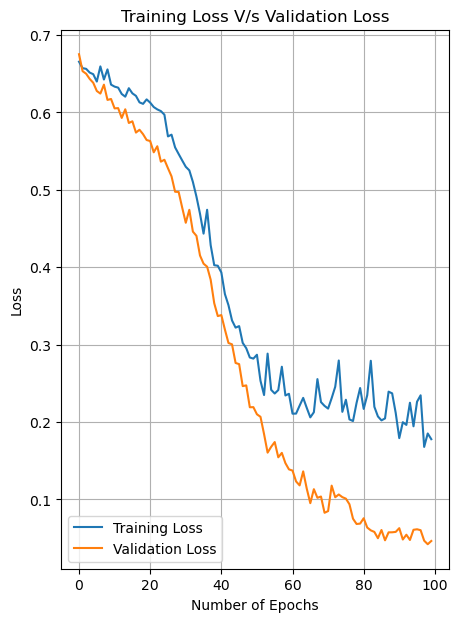

In [19]:
# Losses
xc = range(num_of_epochs)
plt.figure(figsize=(5,7))
plt.plot(xc, val_loss)
plt.plot(xc, train_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'], loc=3)
plt.title('Training Loss V/s Validation Loss')
plt.grid(True)

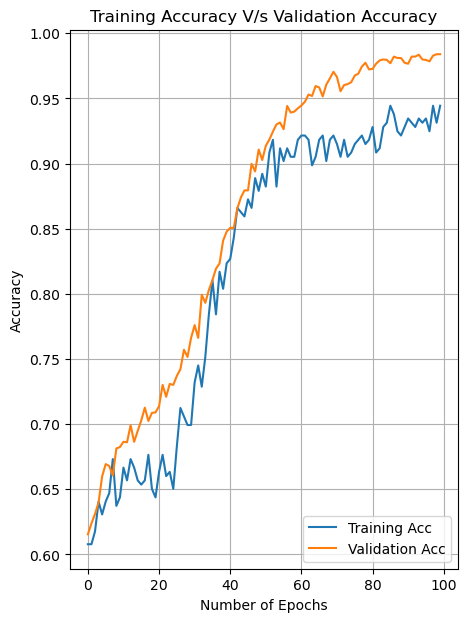

In [20]:
# Accuracy
xc = range(num_of_epochs)
plt.figure(figsize=(5,7))
plt.plot(xc, val_accuracy)
plt.plot(xc, train_accuracy)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Acc','Validation Acc'], loc=4)
plt.title('Training Accuracy V/s Validation Accuracy')
plt.grid(True)

In [21]:
# Testing a random image in MIAS Data
print("Testing a Random Malignant Image in MIAS Dataset -")
loc = 'E:/NN project/Dataset of Mammography with Benign Malignant Breast Masses/MIAS Dataset/test/Malignant Masses/mdb023 (2).png'
test_image = cv2.imread(loc)
test_image = cv2.resize(test_image, (140,92))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image = test_image/255
test_image = np.expand_dims(test_image, axis=0)

print("Shape of test image -", test_image.shape)
print("Predicted accuracies -", adv_model.predict(test_image))
predict_x_value = adv_model.predict(test_image) 
classes_x=np.argmax(predict_x_value, axis=1)
print("Predicted class -", classes_x)

Testing a Random Malignant Image in MIAS Dataset -
Shape of test image - (1, 92, 140, 3)
1/1 [==============================] - 0s 20ms/step
Predicted accuracies - [[0.8115901  0.18840991]]
1/1 [==============================] - 0s 19ms/step
Predicted class - [0]


In [22]:
# Classification Report 
y_pred_value = adv_model.predict(X_test, verbose=1)
yhat_classes = np.argmax(y_pred_value, axis=1)

y_test_value = np.argmax(y_test, axis=1)
print(classification_report(y_test_value, yhat_classes))

24/24 [==============================] - 1s 41ms/step
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       286
           1       0.93      0.96      0.95       478

    accuracy                           0.93       764
   macro avg       0.93      0.92      0.93       764
weighted avg       0.93      0.93      0.93       764

